Введите год для предсказания рождаемости:  2004


/usr/local/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Предсказанная рождаемость в 2004.0 году: 11.59000466693675


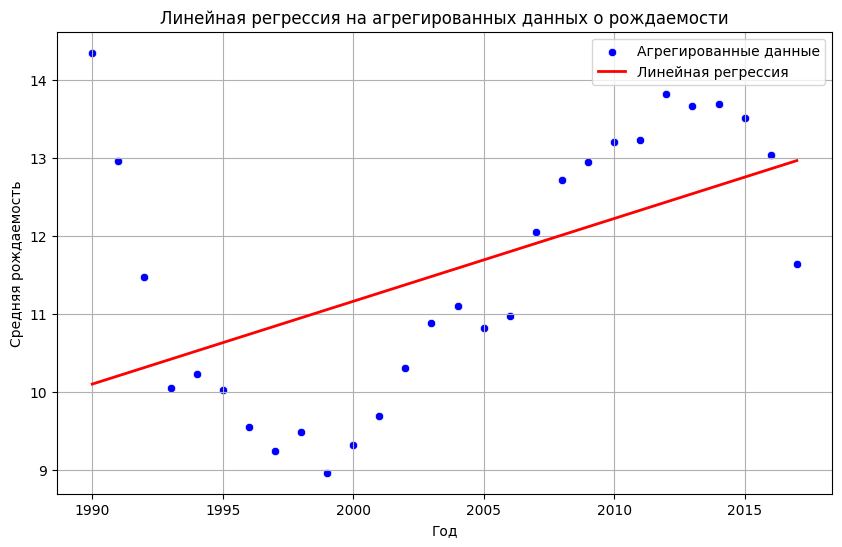

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

data = pd.read_csv('russian_demography.csv')

# Агрегируем данные: рассчитываем среднее значение рождаемости по годам
aggregated_data = data.groupby('year')['birth_rate'].mean().reset_index()

X = aggregated_data[['year']]
y = aggregated_data['birth_rate']

model = LinearRegression()
model.fit(X, y)

year_input = float(input("Введите год для предсказания рождаемости: "))
predicted_birth_rate = model.predict([[year_input]])
print(f"Предсказанная рождаемость в {year_input} году: {predicted_birth_rate[0]}")

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X['year'], y=y, color='blue', label='Агрегированные данные')
plt.plot(X, model.predict(X), color='red', label='Линейная регрессия', linewidth=2)
plt.title('Линейная регрессия на агрегированных данных о рождаемости')
plt.xlabel('Год')
plt.ylabel('Средняя рождаемость')
plt.legend()
plt.grid()
plt.show()


In [14]:
def linear_interpolation(x, x0, y0, x1, y1):
    """
    Функция для выполнения линейной интерполяции.

    :param x: Значение, для которого нужно интерполировать
    :param x0: Первая известная точка по оси x
    :param y0: Значение функции в x0
    :param x1: Вторая известная точка по оси x
    :param y1: Значение функции в x1
    :return: Интерполированное значение функции в x
    """
    if x0 == x1:
        raise ValueError("x0 и x1 не могут быть равны.")
    
    return y0 + (y1 - y0) / (x1 - x0) * (x - x0)

x0 = 1
y0 = 2
x1 = 3
y1 = 4

x = 2

interpolated_value = linear_interpolation(x, x0, y0, x1, y1)
print(f"Интерполированное значение в x = {x}: y = {interpolated_value}")


Интерполированное значение в x = 2: y = 3.0


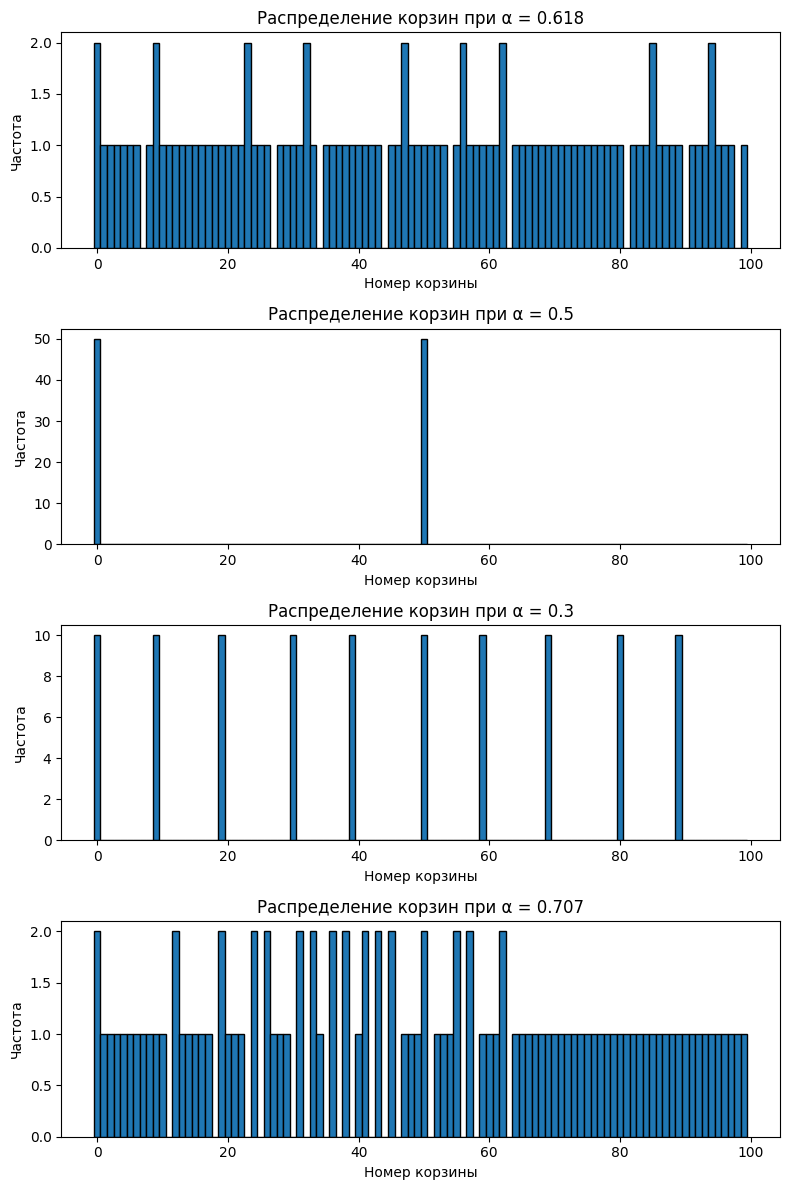

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Настройки
alpha_values = [0.618, 0.5, 0.3, 0.707]  # Разные значения альфа
M = 100  # Количество корзин
h_values = range(1000, 1100)  # Диапазон хеш-значений

# Функция для вычисления номера корзины
def get_bucket(h, alpha, M):
    return int(M * ((h * alpha) % 1))

# Построение распределения корзин для каждого значения альфа
fig, axs = plt.subplots(len(alpha_values), 1, figsize=(8, 12))

for idx, alpha in enumerate(alpha_values):
    buckets = [get_bucket(h, alpha, M) for h in h_values]
    
    # Построение гистограммы
    axs[idx].hist(buckets, bins=range(M + 1), edgecolor='black', align='left')
    axs[idx].set_title(f"Распределение корзин при α = {alpha}")
    axs[idx].set_xlabel("Номер корзины")
    axs[idx].set_ylabel("Частота")

plt.tight_layout()
plt.show()